In [1]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
def read_FNM_Orig(path,fn):
    df=pd.DataFrame(pd.read_csv(path+"\\"+fn+".txt",sep="|", header = None, names=['loan_id','orig_chn',
    'seller','orig_rt','oupb','orig_term','orig_date','first_pay',
    'oltv','ocltv','num_bo','dti','cscore_b','fhb','loan_purp','prop_type','num_unit','occ_stat','state','zip_3',
    'mi_pct','prod_type','cscore_c','mi_type','relo_flg']))
    
    df['first_pay_date'] = pd.to_datetime(df['first_pay'])

    df['oyr'] = df['first_pay_date'].dt.year
    df['omonth'] =df['first_pay_date'].dt.month
    df['oqtr'] =df['first_pay_date'].dt.quarter
    df['fico']=df[['cscore_b','cscore_c']].min(axis=1) 

    raw=np.array(df['mi_type'])
    mi_type=['' for x in range(raw.size)]

    for i in range(raw.size):
        if raw[i]==1:
            mi_type[i]='BP'
        elif raw[i]==2:
            mi_type[i]='LP'
        else:
            mi_type[i]='Unknow'
    df['mi_type']=pd.DataFrame(mi_type)
    ############Save Necessary Variables###########
    df=df[['loan_id','orig_chn','oyr','omonth','oqtr','fico',
    'seller','orig_rt','oupb','orig_term','oltv','ocltv','num_bo','dti','fhb',
    'loan_purp','prop_type','num_unit','occ_stat','state','zip_3',
    'mi_pct','prod_type','mi_type','relo_flg']]
    return df


In [3]:
 fnm_orig_2014q1=read_FNM_Orig("C:\\Users\\wliu\\Desktop","Acquisition_2014Q1")

In [4]:
df_orig = fnm_orig_2014q1
df_orig.head(100)

,loan_id,orig_chn,oyr,omonth,oqtr,fico,seller,orig_rt,oupb,orig_term,...,loan_purp,prop_type,num_unit,occ_stat,state,zip_3,mi_pct,prod_type,mi_type,relo_flg
0,100000506220,R,2014,4,2,710.0,OTHER,4.750,328000,360,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
1,100007679737,R,2014,4,2,647.0,OTHER,5.000,190000,360,...,P,SF,1,P,PA,191,NaN,FRM,Unknow,N
2,100008410787,C,2014,2,1,774.0,FREEDOM MORTGAGE CORP.,4.375,320000,360,...,P,PU,1,P,TX,750,NaN,FRM,Unknow,N
3,100009360302,C,2014,3,1,812.0,OTHER,5.250,92000,360,...,P,PU,1,I,AZ,850,NaN,FRM,Unknow,N
4,100018134297,R,2014,2,1,808.0,OTHER,4.375,176000,360,...,P,SF,1,S,NC,284,NaN,FRM,Unknow,N
5,100018812676,R,2014,4,2,778.0,OTHER,4.375,238000,360,...,R,PU,1,P,WI,530,NaN,FRM,Unknow,N
6,100023715413,C,2014,3,1,742.0,"PACIFIC UNION FINANCIAL, LLC",5.000,231000,360,...,P,SF,1,P,IL,607,30.0,FRM,BP,N
7,100024428873,C,2014,2,1,727.0,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",4.500,172000,360,...,R,PU,1,P,AZ,852,NaN,FRM,Unknow,N
8,100029809089,R,2014,3,1,787.0,OTHER,4.500,162000,360,...,P,SF,1,P,WA,982,30.0,FRM,BP,N
9,100033144008,R,2014,3,1,706.0,OTHER,5.125,41000,360,...,P,SF,1,I,OH,450,NaN,FRM,Unknow,N


In [5]:
def read_FNM_perf(path,fn):
    df=pd.DataFrame(pd.read_csv(path+"\\"+fn+".txt",sep="|", header = None, names=['loan_id',
       'period','servicer','curr_rte','act_UPB','loan_age','rem_mths','adj_rem_months','maturity_date',
       'msa','dlq_status','mod_ind','zb_code','zb_date','lpi_dte','fcc_dte','disp_dte','fcc_cost','pp_cost',
       'ar_cost','ie_cost','tax_cost','ns_procs','ce_procs','rmw_procs','o_procs','non_int_upb',
       'prin_forg_upb_fhfa','repch_flag' ,'prin_forg_upb_o', 'serv_transfer']))
    df['period_dt']=pd.to_datetime(df['period'],format='%m/%d/%Y')
    df['year']=df['period_dt'].dt.year
    df['month']=df['period_dt'].dt.month
    df['qtr']=df['period_dt'].dt.quarter
    df['msa_c']=df.msa.to_string
    df['servicer'].fillna('Unknow',inplace=True)
    df.sort(['loan_id','loan_age'],inplace=True)
    df['lead_loan_id']=df['loan_id'].shift(-1)
    df['ever_delq']=0
      
     #############Monthly to Quartly################
    """
    todel=np.array(df['todel'])
    loan_id=np.array(df.loan_id)
    df['todel']=0
    lead_loan_id=np.array(df.lead_loan_id)
    month=np.array(df.month)
    for i in range(loan_id.size):
        if loan_id[i]==lead_loan_id[i] and month[i] not in [3,6,9,12]:
            todel[i]=1
    df['todel']=pd.DataFrame(todel)
    df=df.loc[df['todel']!=1]
    """
    
    
    df.dlq_status.replace('X','-1',inplace=True)
    df['delq_stat']=pd.to_numeric(df.dlq_status,errors='coerce')
    delq_stat=np.array(df.delq_stat)
    ever_delq=np.array(df.ever_delq)
    status=['' for x in range(ever_delq.size)]
    prev_status=['' for x in range(ever_delq.size)]
    zb_code=np.array(df.zb_code)
    loan_id=np.array(df.loan_id)
    for i in range(ever_delq.size):
        if i==0:
            status[i]='Current'
            prev_status[i]='Current'
        elif loan_id[i]!=loan_id[i-1]:
            status[i]='Current'
            prev_status[i]='Current'
        else:
            ever_delq[i]=ever_delq[i-1]
            prev_status[i]=status[i-1]
        if delq_stat[i]==0 and ever_delq[i]==0:
            status[i]='Current'
        if delq_stat[i] ==0 and ever_delq[i]==1:
            status[i]='Cure' 
        if delq_stat[i]==1:
            status[i]='D30'
            ever_delq[i]=1                           
        if delq_stat[i]==2:
            status[i]='D60'
            ever_delq[i]=1
        if delq_stat[i]==3:
            status[i]='D90'
            ever_delq[i]=1
        if delq_stat[i]==4:
            status[i]='D120'
            ever_delq[i]=1
        if delq_stat[i]==5:
            status[i]='D150'
            ever_delq[i]=1
        if delq_stat[i]==6:
            status[i]='D180'
            ever_delq[i]=1
        if delq_stat[i]>=7:
            status[i]='D180+'
            ever_delq[i]=1
        if delq_stat[i]==-1 and zb_code[i]==1:                          
            status[i]='Prepay'
        if delq_stat[i]==-1 and zb_code[i] in [3,9]:
            status[i]='Claim'
    df['status']=pd.DataFrame(status)
    df['prev_status']=pd.DataFrame(prev_status)
    df['ever_delq']=pd.DataFrame(ever_delq)
    df=df[['loan_id','period_dt','year','month','qtr',
    'servicer','curr_rte','act_UPB','loan_age','adj_rem_months','maturity_date',
    'msa','dlq_status','mod_ind','zb_code','zb_date','lpi_dte','fcc_dte','disp_dte','fcc_cost','pp_cost',
    'ar_cost','ie_cost','tax_cost','ns_procs','ce_procs','rmw_procs','o_procs','non_int_upb',
    'status','prev_status','ever_delq','delq_stat','msa_c']]

 
    return df


In [6]:
FNM_Perf_2014Q1=read_FNM_perf("C:\\Users\\wliu\\Desktop","Performance_2014Q1")

##data['period_dt']=pd.to_datetime(data['period'],infer_datetime_format=True)


C:\Users\wliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\wliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [7]:
df2 = FNM_Perf_2014Q1
df2.head(100)

,loan_id,period_dt,year,month,qtr,servicer,curr_rte,act_UPB,loan_age,adj_rem_months,...,ns_procs,ce_procs,rmw_procs,o_procs,non_int_upb,status,prev_status,ever_delq,delq_stat,msa_c
0,100000506220,2014-03-01,2014,3,1,OTHER,4.750,NaN,0,360.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
1,100000506220,2014-04-01,2014,4,2,Unknow,4.750,NaN,1,359.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
2,100000506220,2014-05-01,2014,5,2,Unknow,4.750,NaN,2,358.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
3,100000506220,2014-06-01,2014,6,2,Unknow,4.750,NaN,3,357.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
4,100000506220,2014-07-01,2014,7,3,Unknow,4.750,NaN,4,356.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
5,100000506220,2014-08-01,2014,8,3,Unknow,4.750,NaN,5,355.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
6,100000506220,2014-09-01,2014,9,3,Unknow,4.750,324995.39,6,353.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
7,100000506220,2014-10-01,2014,10,4,Unknow,4.750,324470.83,7,352.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
8,100000506220,2014-11-01,2014,11,4,Unknow,4.750,323944.19,8,351.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...
9,100000506220,2014-12-01,2014,12,4,Unknow,4.750,323415.47,9,350.0,...,NaN,NaN,NaN,NaN,NaN,Current,Current,0,0.0,<bound method Series.to_string of 0 3...


In [8]:
#FNM_Perf_2014Q1.loc[FNM_Perf_2014Q1['status']=="D180"].head(100)
'''
x=[0 for k in range(10)]
x.shape
mi_type=['' for x in range(10)] 
'''

#FNM_Perf_2014Q1.loc[184160:184180,['loan_id','zb_code','status','prev_status','dlq_status']]

#df_temp = df2[(df2.status == "D180")] 
#df_temp[['loan_id','zb_code','status','prev_status','dlq_status']]

"\nx=[0 for k in range(10)]\nx.shape\nmi_type=['' for x in range(10)] \n"

In [9]:
#Merge Perform and Origination
FNM_2014q1=pd.merge(FNM_Perf_2014Q1,fnm_orig_2014q1,how='left',on=['loan_id'])
df = FNM_2014q1
df.tail(100)

,loan_id,period_dt,year,month,qtr,servicer,curr_rte,act_UPB,loan_age,adj_rem_months,...,loan_purp,prop_type,num_unit,occ_stat,state,zip_3,mi_pct,prod_type,mi_type,relo_flg
5753052,999988575844,2014-07-01,2014,7,3,Unknow,4.500,NaN,4,356.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753053,999988575844,2014-08-01,2014,8,3,Unknow,4.500,NaN,5,96.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753054,999988575844,2014-09-01,2014,9,3,Unknow,4.500,68683.03,6,354.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753055,999988575844,2014-10-01,2014,10,4,Unknow,4.500,68589.79,7,353.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753056,999988575844,2014-11-01,2014,11,4,Unknow,4.500,68496.20,8,352.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753057,999988575844,2014-12-01,2014,12,4,Unknow,4.500,68402.26,9,351.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753058,999988575844,2015-01-01,2015,1,1,Unknow,4.500,68307.97,10,350.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753059,999988575844,2015-02-01,2015,2,1,Unknow,4.500,68213.32,11,349.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753060,999988575844,2015-03-01,2015,3,1,Unknow,4.500,68118.32,12,348.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N
5753061,999988575844,2015-04-01,2015,4,2,Unknow,4.500,68022.96,13,347.0,...,P,SF,1,P,FL,321,NaN,FRM,Unknow,N


In [10]:
# Get size of data
df.shape

(5753152, 58)

In [11]:
# unique number of loans
df.loan_id.nunique()

197317

In [12]:
# Get the list of columns along with dtypes
df.dtypes

loan_id                    int64
period_dt         datetime64[ns]
year                       int64
month                      int64
qtr                        int64
servicer                  object
curr_rte                 float64
act_UPB                  float64
loan_age                   int64
adj_rem_months           float64
maturity_date             object
msa                        int64
dlq_status                object
mod_ind                   object
zb_code                  float64
zb_date                   object
lpi_dte                   object
fcc_dte                   object
disp_dte                  object
fcc_cost                 float64
pp_cost                  float64
ar_cost                  float64
ie_cost                  float64
tax_cost                 float64
ns_procs                 float64
ce_procs                 float64
rmw_procs                float64
o_procs                  float64
non_int_upb              float64
status                    object
prev_statu

### Exploratory Data Analysis 

In [13]:
df.head(50)

,loan_id,period_dt,year,month,qtr,servicer,curr_rte,act_UPB,loan_age,adj_rem_months,...,loan_purp,prop_type,num_unit,occ_stat,state,zip_3,mi_pct,prod_type,mi_type,relo_flg
0,100000506220,2014-03-01,2014,3,1,OTHER,4.75,NaN,0,360.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
1,100000506220,2014-04-01,2014,4,2,Unknow,4.75,NaN,1,359.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
2,100000506220,2014-05-01,2014,5,2,Unknow,4.75,NaN,2,358.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
3,100000506220,2014-06-01,2014,6,2,Unknow,4.75,NaN,3,357.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
4,100000506220,2014-07-01,2014,7,3,Unknow,4.75,NaN,4,356.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
5,100000506220,2014-08-01,2014,8,3,Unknow,4.75,NaN,5,355.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
6,100000506220,2014-09-01,2014,9,3,Unknow,4.75,324995.39,6,353.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
7,100000506220,2014-10-01,2014,10,4,Unknow,4.75,324470.83,7,352.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
8,100000506220,2014-11-01,2014,11,4,Unknow,4.75,323944.19,8,351.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
9,100000506220,2014-12-01,2014,12,4,Unknow,4.75,323415.47,9,350.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N


In [14]:
#check any column with NAN value
df.isnull().any()

loan_id           False
period_dt         False
year              False
month             False
qtr               False
servicer          False
curr_rte          False
act_UPB            True
loan_age          False
adj_rem_months     True
maturity_date     False
msa               False
dlq_status         True
mod_ind           False
zb_code            True
zb_date            True
lpi_dte            True
fcc_dte            True
disp_dte           True
fcc_cost           True
pp_cost            True
ar_cost            True
ie_cost            True
tax_cost           True
ns_procs           True
ce_procs           True
rmw_procs          True
o_procs            True
non_int_upb        True
status            False
prev_status       False
ever_delq         False
delq_stat          True
msa_c             False
orig_chn          False
oyr               False
omonth            False
oqtr              False
fico               True
seller            False
orig_rt           False
oupb            

**Loan Purpose**: Purchase(P), Cash-Out(C), No Cash-Out Refinance(R), Refinance-Not Specified(U) 

In [15]:
(df.groupby('loan_purp').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

loan_purp
C    17.6%
P    65.7%
R    16.7%
U     0.0%
Name: loan_id, dtype: object

**Property Type**: Single-Family(SF), Condo(CO), Co-Op(CP), Manufactured Housing(MH), PUD(PU) 

In [16]:
(df.groupby('prop_type').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

prop_type
CO    10.6%
CP     0.7%
MH     0.5%
PU    27.3%
SF    60.9%
Name: loan_id, dtype: object

**Number of Units** 

In [17]:
(df.groupby('num_unit').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

num_unit
1    97.1%
2     1.9%
3     0.4%
4     0.5%
Name: loan_id, dtype: object

**Origination Channel:** Retail(R), Broker(B), Correspondent(C)

In [18]:
(df.groupby('orig_chn').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

orig_chn
B    10.9%
C    33.3%
R    55.8%
Name: loan_id, dtype: object

**Origination Year** 

In [19]:
(df.groupby('oyr').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

oyr
2012     0.0%
2013     2.0%
2014    98.0%
Name: loan_id, dtype: object

**Product Type - Fixed Rate or Adjusted Rate Mortgage**

In [20]:
(df.groupby('prod_type').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

prod_type
FRM    100.0%
Name: loan_id, dtype: object

**Occupancy Status:** Principal(P), Second(S), Investor(I), Unknown(U)

In [21]:
(df.groupby('occ_stat').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

occ_stat
I    11.7%
P    83.3%
S     5.0%
Name: loan_id, dtype: object

**DTI**

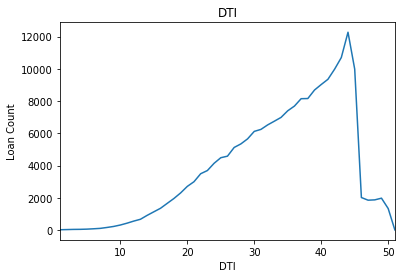

In [22]:
dti_distri = df.groupby('dti').loan_id.nunique().sort_index()
dti_distri.plot(kind = 'line', title = 'DTI').set(xlabel = 'DTI', ylabel = 'Loan Count')
plt.show()

In [23]:
df.dti.describe()

count    5.751540e+06
mean     3.451850e+01
std      8.743452e+00
min      1.000000e+00
25%      2.800000e+01
50%      3.600000e+01
75%      4.200000e+01
max      5.100000e+01
Name: dti, dtype: float64

**First Time Home-Buyer**

In [24]:
(df.groupby('fhb').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

fhb
N    75.3%
Y    24.7%
Name: loan_id, dtype: object

**Relocation Flag**

In [25]:
(df.groupby('relo_flg').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

relo_flg
N    99.0%
Y     1.0%
Name: loan_id, dtype: object

**Modification Indicator** 

In [26]:
(df.groupby('mod_ind').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

mod_ind
N    100.0%
Y      0.2%
Name: loan_id, dtype: object

**Combined LTV**

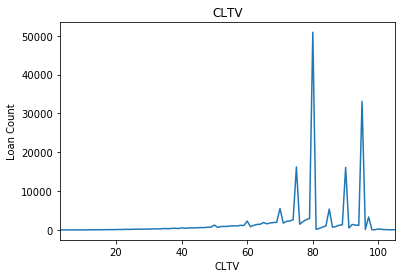

In [27]:
cltv_distri = df.groupby('ocltv').loan_id.nunique().sort_index()
cltv_distri.plot(kind = 'line', title = 'CLTV').set(xlabel = 'CLTV', ylabel = 'Loan Count')
plt.show()

In [28]:
df.ocltv.describe()

count    5.753152e+06
mean     7.843872e+01
std      1.482208e+01
min      3.000000e+00
25%      7.400000e+01
50%      8.000000e+01
75%      9.000000e+01
max      1.050000e+02
Name: ocltv, dtype: float64

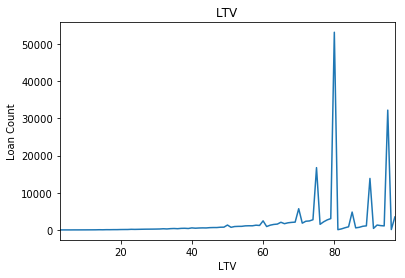

In [29]:
ltv_distri = df.groupby('oltv').loan_id.nunique().sort_index()
ltv_distri.plot(kind = 'line', title = 'LTV').set(xlabel = 'LTV', ylabel = 'Loan Count')
plt.show()

**Number of Borrowers**

In [30]:
(df.groupby('num_bo').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

num_bo
1    53.0%
2    46.5%
3     0.4%
4     0.1%
5     0.0%
6     0.0%
Name: loan_id, dtype: object

Keep the latest status in the table and remove the other records

In [31]:
#latest_record = df.groupby(['loan_id','period_dt']).last()
latest_record = df.groupby('loan_id').last().reset_index()
latest_record.head()

,loan_id,period_dt,year,month,qtr,servicer,curr_rte,act_UPB,loan_age,adj_rem_months,...,loan_purp,prop_type,num_unit,occ_stat,state,zip_3,mi_pct,prod_type,mi_type,relo_flg
0,100000506220,2016-10-01,2016,10,4,Unknow,4.750,311918.69,31,0.0,...,R,SF,1,P,CA,913,NaN,FRM,Unknow,N
1,100007679737,2016-12-01,2016,12,4,Unknow,5.000,175425.80,33,303.0,...,P,SF,1,P,PA,191,NaN,FRM,Unknow,N
2,100008410787,2016-01-01,2016,1,1,Unknow,4.375,309625.68,24,0.0,...,P,PU,1,P,TX,750,NaN,FRM,Unknow,N
3,100009360302,2016-12-01,2016,12,4,Unknow,5.250,88257.01,34,324.0,...,P,PU,1,I,AZ,850,NaN,FRM,Unknow,N
4,100018134297,2016-12-01,2016,12,4,Unknow,4.375,118264.52,35,186.0,...,P,SF,1,S,NC,284,NaN,FRM,Unknow,N


**Ever Delinquent vs. Current Status**

In [32]:
(latest_record.groupby('ever_delq').loan_id.nunique()/latest_record.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

ever_delq
0    93.0%
1     7.0%
Name: loan_id, dtype: object

In [33]:
latest_record.groupby('ever_delq').loan_id.nunique()

ever_delq
0    183440
1     13877
Name: loan_id, dtype: int64

In [34]:
(latest_record.groupby(['ever_delq','status']).loan_id.nunique()/latest_record.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

ever_delq  status 
0                      0.2%
           Current    54.5%
           Prepay     38.3%
1                      0.1%
           Cure        4.1%
           D120        0.1%
           D150        0.0%
           D180        0.0%
           D180+       0.1%
           D30         0.7%
           D60         0.1%
           D90         0.1%
           Prepay      1.7%
Name: loan_id, dtype: object

**Recreate "Bad loan" vs. "Good loan" class flag**

In [35]:
latest_record['RiskLoan'] = np.where((latest_record.status=='Current') | (latest_record.status=='Prepay')|
                                  (latest_record.status=='D30'), 0, 1)

In [36]:
latest_record.head()

,loan_id,period_dt,year,month,qtr,servicer,curr_rte,act_UPB,loan_age,adj_rem_months,...,prop_type,num_unit,occ_stat,state,zip_3,mi_pct,prod_type,mi_type,relo_flg,RiskLoan
0,100000506220,2016-10-01,2016,10,4,Unknow,4.750,311918.69,31,0.0,...,SF,1,P,CA,913,NaN,FRM,Unknow,N,0
1,100007679737,2016-12-01,2016,12,4,Unknow,5.000,175425.80,33,303.0,...,SF,1,P,PA,191,NaN,FRM,Unknow,N,0
2,100008410787,2016-01-01,2016,1,1,Unknow,4.375,309625.68,24,0.0,...,PU,1,P,TX,750,NaN,FRM,Unknow,N,0
3,100009360302,2016-12-01,2016,12,4,Unknow,5.250,88257.01,34,324.0,...,PU,1,I,AZ,850,NaN,FRM,Unknow,N,0
4,100018134297,2016-12-01,2016,12,4,Unknow,4.375,118264.52,35,186.0,...,SF,1,S,NC,284,NaN,FRM,Unknow,N,0


In [37]:
(latest_record.groupby('RiskLoan').loan_id.nunique()/latest_record.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

RiskLoan
0    95.1%
1     4.9%
Name: loan_id, dtype: object

In [38]:
latest_record.groupby('RiskLoan').loan_id.nunique()

RiskLoan
0    187711
1      9606
Name: loan_id, dtype: int64

**Due to unbalanced data, we will need to upsample or downsample one of the class. Here I chose to downsample good loans**
 - Select 5000 per group (by RiskLoan)

In [39]:
df_new =latest_record.groupby("RiskLoan",as_index=False).apply(lambda x: x.sample(5000)).reset_index()

In [40]:
df_new.groupby('RiskLoan').loan_id.nunique()

RiskLoan
0    5000
1    5000
Name: loan_id, dtype: int64

In [41]:
df_new

,level_0,level_1,loan_id,period_dt,year,month,qtr,servicer,curr_rte,act_UPB,...,prop_type,num_unit,occ_stat,state,zip_3,mi_pct,prod_type,mi_type,relo_flg,RiskLoan
0,0,91325,516571315878,2016-12-01,2016,12,4,Unknow,4.375,104479.44,...,SF,1,P,NY,115,NaN,FRM,Unknow,N,0
1,0,151259,789742342199,2015-04-01,2015,4,2,Unknow,4.500,213635.62,...,PU,1,P,AZ,853,30.0,FRM,BP,N,0
2,0,85345,489656912194,2016-12-01,2016,12,4,Unknow,4.500,318508.11,...,PU,1,P,AZ,852,NaN,FRM,Unknow,N,0
3,0,112636,613035015689,2015-01-01,2015,1,1,Unknow,5.125,296847.00,...,PU,1,P,UT,841,25.0,FRM,LP,N,0
4,0,132406,703310181873,2015-07-01,2015,7,3,Unknow,5.000,228166.81,...,SF,1,P,MT,597,NaN,FRM,Unknow,N,0
5,0,162362,840382638712,2016-12-01,2016,12,4,Unknow,4.250,260686.73,...,SF,1,P,CA,943,NaN,FRM,Unknow,N,0
6,0,173961,893304358593,2016-12-01,2016,12,4,Unknow,4.375,273072.22,...,PU,1,P,VA,201,NaN,FRM,Unknow,N,0
7,0,139609,736730718233,2015-12-01,2015,12,4,Unknow,4.750,148195.73,...,SF,1,P,IL,601,NaN,FRM,Unknow,N,0
8,0,103673,572514279046,2016-12-01,2016,12,4,Unknow,4.625,186277.23,...,PU,1,P,TX,750,NaN,FRM,Unknow,N,0
9,0,116804,631951601448,2015-07-01,2015,7,3,Unknow,4.625,311500.89,...,PU,1,P,GA,302,30.0,FRM,BP,N,0


** Data Manipulation for null value and non-normally distributed columns **

In [42]:
df_new['multi_unit'] = np.where((df_new.num_unit==1), 0, 1)

In [43]:
(df_new.groupby('multi_unit').loan_id.nunique()/df_new.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

multi_unit
0    96.4%
1     3.6%
Name: loan_id, dtype: object

In [44]:
def f(row):
    if row['dti'] <20 :
        val = 17.5
    elif 20.0<=row['dti'] <25.0:
        val = 22.5
    elif 25.0<=row['dti'] <30.0:
        val = 27.5
    elif 30.0<=row['dti'] <35.0:
        val = 32.5
    elif 35.0<=row['dti'] <40.0:
        val = 37.5
    elif 40.0<=row['dti'] <45.0:
        val = 42.5
    elif 45.0<=row['dti'] <50.0:
        val = 47.5
    else:
        val = 52.5
    return val

In [45]:
df_new['dti_new'] = (df_new.apply(f, axis=1))

In [46]:
(df_new.groupby('dti_new').loan_id.nunique()/df_new.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

dti_new
17.5     5.5%
22.5     7.8%
27.5    11.5%
32.5    15.3%
37.5    21.0%
42.5    27.8%
47.5    10.3%
52.5     0.8%
Name: loan_id, dtype: object

**DTI and CLTV are NOT normally distributed**

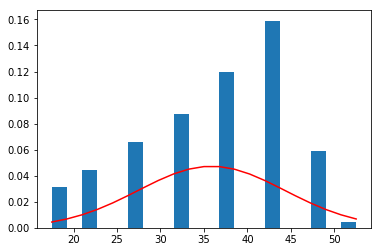

In [47]:
n, bins, patches = plt.hist(df_new.dti_new,20, normed=2)
mu = np.mean(df_new.dti_new)
sigma = np.std(df_new.dti_new)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')

**normaltest** returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen.

In [48]:
x=df_new.dti_new
stats.normaltest(x)

NormaltestResult(statistic=673.80753625482077, pvalue=4.8367380780928548e-147)

In [49]:
def f2(row):
    if row['ocltv'] <=50 :
        val = 50
    elif 50< row['ocltv'] <=60:
        val = 60
    elif 60< row['ocltv'] <=70:
        val = 70
    elif 70< row['ocltv'] <=80:
        val = 80
    elif 80< row['ocltv'] <=90:
        val = 90
    else:
        val =100
    return val

In [50]:
df_new['cltv_new'] = (df_new.apply(f2, axis=1))

In [51]:
(df_new.groupby('cltv_new').loan_id.nunique()/df_new.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

cltv_new
50      6.1%
60      5.8%
70     10.3%
80     42.4%
90     13.7%
100    21.6%
Name: loan_id, dtype: object

In [52]:
df_new.ocltv.describe()

count    10000.000000
mean        78.364000
std         14.687943
min         12.000000
25%         74.000000
50%         80.000000
75%         90.000000
max        105.000000
Name: ocltv, dtype: float64

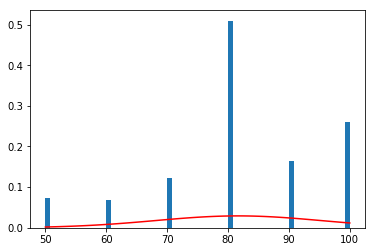

In [53]:
#dti distribution
n, bins, patches = plt.hist(df_new.cltv_new,60, normed=2)
mu = np.mean(df_new.cltv_new)
sigma = np.std(df_new.cltv_new)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')

In [54]:
x=df_new.cltv_new
stats.normaltest(x)

NormaltestResult(statistic=385.67835618433992, pvalue=1.7824159500186571e-84)

In [55]:
df_new['multi_borrower'] = np.where((df_new.num_bo==1), 0, 1)

In [56]:
(df_new.groupby('multi_borrower').loan_id.nunique()/df_new.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

multi_borrower
0    58.7%
1    41.3%
Name: loan_id, dtype: object

In [57]:
df_new['fhb_new'] = np.where((df_new.fhb=="N"), 0, 1)

### Preliminary features to be considered
- **Loan Purpose**: loan_purp 
- **Property Type**: prop_type
- **Number of Units**: multi_unit
- **Origination Channel**: orig_chn
- **Occupancy Status**: occ_stat
- **DTI**: dti_new
- **First Time Home Buyer Indicator**: fhb
- **Combined LTV**: cltv_new
- **Number of Borrower**: multi_borrower

In [58]:
#Create a new DataFrame to just include the independent variable and dependent variables
df1 = df_new[['loan_purp', 'prop_type', 'multi_unit', 'orig_chn', 'occ_stat', 'dti_new', 'fhb_new', 'cltv_new', 
             'multi_borrower','RiskLoan']]

In [59]:
type(df1)

pandas.core.frame.DataFrame

In [60]:
df1.reset_index()

,index,loan_purp,prop_type,multi_unit,orig_chn,occ_stat,dti_new,fhb_new,cltv_new,multi_borrower,RiskLoan
0,0,C,SF,0,R,P,52.5,0,50,0,0
1,1,P,PU,0,C,P,37.5,0,100,1,0
2,2,P,PU,0,R,P,37.5,0,80,1,0
3,3,P,PU,0,R,P,47.5,0,90,1,0
4,4,P,SF,0,C,P,37.5,0,80,0,0
5,5,R,SF,0,R,P,27.5,0,80,0,0
6,6,C,PU,0,R,P,32.5,0,80,1,0
7,7,R,SF,0,R,P,37.5,0,70,1,0
8,8,R,PU,0,C,P,32.5,0,70,1,0
9,9,P,PU,0,R,P,37.5,0,100,1,0


In [61]:
X = df1.iloc[:,0:9].values
y = df1.iloc[:,-1].values

**Encode Categorical Columns**
- Use LabelEncoder to transform categorical columns to numeric value, and then use OneHotEncoder to get dummy variable
- Create dummy variables for fields which have more than 2 values

In [62]:
X

array([['C', 'SF', 0, ..., 0, 50, 0],
       ['P', 'PU', 0, ..., 0, 100, 1],
       ['P', 'PU', 0, ..., 0, 80, 1],
       ..., 
       ['C', 'SF', 0, ..., 0, 70, 0],
       ['C', 'SF', 0, ..., 0, 80, 1],
       ['P', 'SF', 0, ..., 0, 100, 0]], dtype=object)

In [63]:
df_X = pd.DataFrame(X, columns =['loan_purp', 'prop_type', 'multi_unit', 'orig_chn', 'occ_stat', 'dti_new', 'fhb_new', 'cltv_new', 
             'multi_borrower'])

In [64]:
# Create a set of dummy variables from the categorical variables
df_X_dummy = pd.get_dummies(df_X[['loan_purp','prop_type','orig_chn', 'occ_stat', 'dti_new','cltv_new']]).astype(np.int64)

In [65]:
df_X_dummy.shape

(10000, 28)

In [66]:
# Join the dummy variables to the main dataframe
df_X_new = pd.concat([df_X, df_X_dummy], axis=1)
df_X_new

,loan_purp,prop_type,multi_unit,orig_chn,occ_stat,dti_new,fhb_new,cltv_new,multi_borrower,loan_purp_C,...,dti_new_37.5,dti_new_42.5,dti_new_47.5,dti_new_52.5,cltv_new_50,cltv_new_60,cltv_new_70,cltv_new_80,cltv_new_90,cltv_new_100
0,C,SF,0,R,P,52.5,0,50,0,1,...,0,0,0,1,1,0,0,0,0,0
1,P,PU,0,C,P,37.5,0,100,1,0,...,1,0,0,0,0,0,0,0,0,1
2,P,PU,0,R,P,37.5,0,80,1,0,...,1,0,0,0,0,0,0,1,0,0
3,P,PU,0,R,P,47.5,0,90,1,0,...,0,0,1,0,0,0,0,0,1,0
4,P,SF,0,C,P,37.5,0,80,0,0,...,1,0,0,0,0,0,0,1,0,0
5,R,SF,0,R,P,27.5,0,80,0,0,...,0,0,0,0,0,0,0,1,0,0
6,C,PU,0,R,P,32.5,0,80,1,1,...,0,0,0,0,0,0,0,1,0,0
7,R,SF,0,R,P,37.5,0,70,1,0,...,1,0,0,0,0,0,1,0,0,0
8,R,PU,0,C,P,32.5,0,70,1,0,...,0,0,0,0,0,0,1,0,0,0
9,P,PU,0,R,P,37.5,0,100,1,0,...,1,0,0,0,0,0,0,0,0,1


In [67]:
df_X_new.shape

(10000, 37)

In [68]:
#Drop non original categorical columns
df_X_new = df_X_new.drop(df_X_new.columns[[0, 1, 3,4,5,7]], axis=1)  

In [69]:
df_X_new.head()

,multi_unit,fhb_new,multi_borrower,loan_purp_C,loan_purp_P,loan_purp_R,prop_type_CO,prop_type_CP,prop_type_MH,prop_type_PU,...,dti_new_37.5,dti_new_42.5,dti_new_47.5,dti_new_52.5,cltv_new_50,cltv_new_60,cltv_new_70,cltv_new_80,cltv_new_90,cltv_new_100
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [70]:
df_X_new.dtypes

multi_unit        object
fhb_new           object
multi_borrower    object
loan_purp_C        int64
loan_purp_P        int64
loan_purp_R        int64
prop_type_CO       int64
prop_type_CP       int64
prop_type_MH       int64
prop_type_PU       int64
prop_type_SF       int64
orig_chn_B         int64
orig_chn_C         int64
orig_chn_R         int64
occ_stat_I         int64
occ_stat_P         int64
occ_stat_S         int64
dti_new_17.5       int64
dti_new_22.5       int64
dti_new_27.5       int64
dti_new_32.5       int64
dti_new_37.5       int64
dti_new_42.5       int64
dti_new_47.5       int64
dti_new_52.5       int64
cltv_new_50        int64
cltv_new_60        int64
cltv_new_70        int64
cltv_new_80        int64
cltv_new_90        int64
cltv_new_100       int64
dtype: object

In [71]:
df_X_new.apply(pd.to_numeric).dtypes

multi_unit        int64
fhb_new           int64
multi_borrower    int64
loan_purp_C       int64
loan_purp_P       int64
loan_purp_R       int64
prop_type_CO      int64
prop_type_CP      int64
prop_type_MH      int64
prop_type_PU      int64
prop_type_SF      int64
orig_chn_B        int64
orig_chn_C        int64
orig_chn_R        int64
occ_stat_I        int64
occ_stat_P        int64
occ_stat_S        int64
dti_new_17.5      int64
dti_new_22.5      int64
dti_new_27.5      int64
dti_new_32.5      int64
dti_new_37.5      int64
dti_new_42.5      int64
dti_new_47.5      int64
dti_new_52.5      int64
cltv_new_50       int64
cltv_new_60       int64
cltv_new_70       int64
cltv_new_80       int64
cltv_new_90       int64
cltv_new_100      int64
dtype: object

In [72]:
# Change the transformed dataframe to array
X = df_X_new.as_matrix()

In [73]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)